In [13]:
ans = main_multiple(1000)


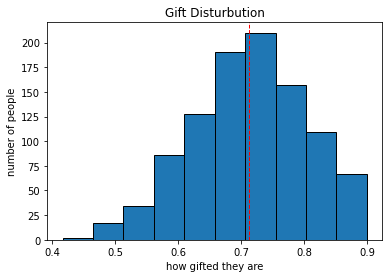

In [17]:
plt.hist(ans, bins=10, edgecolor='black')
mean = np.mean(ans)
median = np.median(ans)
# 添加標籤和標題
plt.axvline(mean, c="r", ls="--", lw=1)
# plt.axvline(median, c="r", ls="--", lw=1)
plt.xlabel('how gifted they are')
plt.ylabel('number of people')
plt.title('Gift Disturbution')

# 顯示圖形
plt.show()

In [1]:
# 產生隨機數據

N_people = 1000
life_period = 80

def main_multiple(n):
    ans = []
    for i in range(n):
        db = np.random.normal(loc=0.6, scale=0.1, size=(N_people))

        #調整上下限
        db[db > 0.9] = 0.9
        db[db < 0.3] = 0.3

        # 添加人生歷程 
        life_advance = np.random.rand(N_people,life_period)

        # 大於0.9視為好運 小於0.1視為壞運
        life_advance[(life_advance >= 0.9)] = 2.0
        life_advance[(life_advance >= 0.1) & (life_advance <= 0.9)] = 1
        life_advance[(life_advance <= 0.1)] = 0.5

        #跑結果
        property1 = life_process(db ,life_advance)

        luck = compute_luck(db ,life_advance)

        # 找出最多財產的人的天分
        rich = property1.index(max(property1))
        ans += luck[rich][0],
        
    return ans

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#跑結果 
def life_process(data ,arr): #data為gift分配 ,arr為 life_advance
    res = []
    for ind ,ele in enumerate(arr):
        val = data[ind]
        for j in ele:
            if j == 0.5:
                val /= 2
            elif j == 2:
                rd =  np.random.rand()
                if rd < data[ind]:
                    val *= 2
        res += val,
    return res

# 統計好運壞運次數
def compute_luck(data ,arr):
    luck = []
    for ind ,ele in enumerate(arr):  
        gift    = data[ind]
        count_1 = np.count_nonzero(ele == 0.5)
        count_2 = np.count_nonzero(ele == 2)
    
        luck += (gift ,count_1 ,count_2),
    return luck
